# Gov Covid API
## Cambridge
### https://coronavirus.data.gov.uk/developers-guide

Install library with: `pip install uk-covid19`

In [1]:
import uk_covid19 as cv
import pandas as pd
import numpy as np

from datetime import date, timedelta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline


In [2]:
filters = ["areaType=ltla", "areaName=Cambridge"] 

dataStructure = {   
    "date": "date", 
    "areaName": "areaName", 
    "newCases": "newCasesBySpecimenDate",  
    "newDeaths": "newDeathsByDeathDate", 
    } 

objCV19 = cv.Cov19API(filters=filters, structure=dataStructure) 

apiResult = objCV19.get_dataframe()

apiResult.head()

,date,areaName,newCases,newDeaths
0,2020-10-27,Cambridge,1,0.0
1,2020-10-26,Cambridge,16,0.0
2,2020-10-25,Cambridge,24,0.0
3,2020-10-24,Cambridge,10,0.0
4,2020-10-23,Cambridge,21,0.0


### Data at local level is unreliable for yesterday so the following code removes it and ignores data older than 62 days.

In [3]:
earliestDate = date.today() - timedelta(days=62)
earliestDate = earliestDate.strftime('%Y-%m-%d')

yesterday = date.today() - timedelta(days=1)
yesterday = yesterday.strftime('%Y-%m-%d')

df = apiResult

df = df[(df["date"] >= earliestDate) & (df["date"] < yesterday)]

df = df.sort_values(by="date")

### Calculate 7 day rolling averages for New Cases and New Deaths.

In [4]:
df['newCases_SMA_7'] = df["newCases"].rolling(window=7).mean()
df['newDeaths_SMA_7'] = df["newDeaths"].rolling(window=7).mean()

df.tail(8)

,date,areaName,newCases,newDeaths,newCases_SMA_7,newDeaths_SMA_7
8,2020-10-19,Cambridge,56,0.0,28.285714,0.285714
7,2020-10-20,Cambridge,45,0.0,29.142857,0.142857
6,2020-10-21,Cambridge,40,1.0,30.428571,0.285714
5,2020-10-22,Cambridge,45,0.0,32.428571,0.142857
4,2020-10-23,Cambridge,21,0.0,33.428571,0.142857
3,2020-10-24,Cambridge,10,0.0,33.714286,0.142857
2,2020-10-25,Cambridge,24,0.0,34.428571,0.142857
1,2020-10-26,Cambridge,16,0.0,28.714286,0.142857


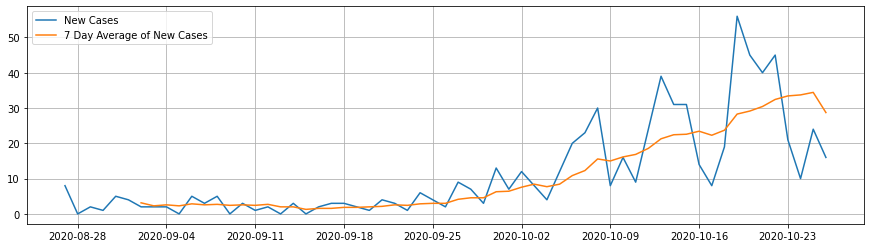

In [5]:
plt.figure(figsize=[15,4])
plt.grid(True)

ax = plt.gca()
locator = mdates.DayLocator(interval = 7)
ax.xaxis.set_major_locator(locator)

plt.xlabel = "Date"
plt.ylabel = "Cases"

plt.plot(df["date"], df["newCases"], label="New Cases")
plt.plot(df["date"], df["newCases_SMA_7"], label="7 Day Average of New Cases")
plt.legend(loc=2)

plt.show()

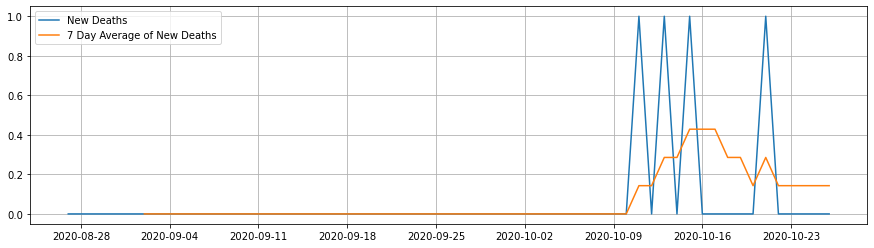

In [6]:
plt.figure(figsize=[15,4])
plt.grid(True)

ax = plt.gca()
locator = mdates.DayLocator(interval = 7)
ax.xaxis.set_major_locator(locator)

plt.xlabel = "Date"
plt.ylabel = "Deaths"

plt.plot(df["date"], df["newDeaths"], label="New Deaths")
plt.plot(df["date"], df["newDeaths_SMA_7"], label="7 Day Average of New Deaths")
plt.legend(loc=2)

plt.show()